In [1]:
%matplotlib inline

In [10]:
import matplotlib.pyplot as plt
import numpy as np
import h5py, sys, os
sys.path.append(os.path.join(os.environ['ATS_SRC_DIR'],'tools', 'utils'))
import ats_xdmf
import plot_column_data

f = h5py.File('../Phenology_calibration/ET_output_test/ats_vis_data.h5')
f_surf = h5py.File('../Phenology_calibration/ET_output_test/ats_vis_surface_data.h5')
#f_mesh = h5py.File('')
#f['subsurface_ecosim_water_source']['1624'][:]
f.keys()
f_surf.keys()

<KeysViewHDF5 ['surface-LAI', 'surface-SAI', 'surface-air_temperature', 'surface-albedo', 'surface-albedos.bare', 'surface-albedos.snow', 'surface-albedos.water', 'surface-area_fractions.bare', 'surface-area_fractions.snow', 'surface-area_fractions.water', 'surface-aspect', 'surface-canopy_latent_heat', 'surface-canopy_longwave_radiation', 'surface-canopy_sensible_heat', 'surface-canopy_surface_water', 'surface-cell_volume', 'surface-ecosim_source', 'surface-ecosim_water_source', 'surface-ecosim_water_source_mols', 'surface-elevation', 'surface-emissivities.bare', 'surface-emissivities.snow', 'surface-emissivities.water', 'surface-energy', 'surface-energy_source_new', 'surface-enthalpy', 'surface-evaporation_ground', 'surface-evaporation_litter', 'surface-evaporation_snow', 'surface-evaporative_flux', 'surface-evapotranspiration', 'surface-incoming_longwave_radiation', 'surface-incoming_shortwave_radiation', 'surface-internal_energy_ice', 'surface-internal_energy_liquid', 'surface-mann

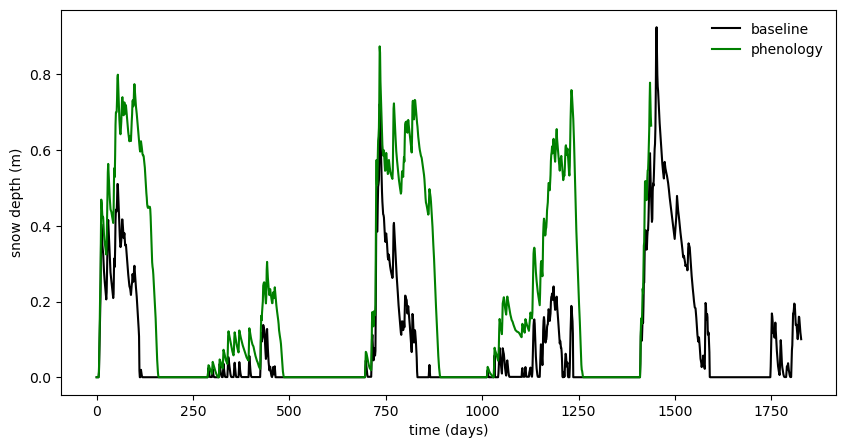

In [4]:
ss_base = np.loadtxt("../Albedo_runs/Baseline_heat_test/snow_status.dat",delimiter=",")
ss_phen = np.loadtxt("../Phenology_calibration/ET_output_test/snow_status.dat",delimiter=",")

time = ss_base[:,0]/86400
t_phen = ss_phen[:,0]/86400
sd_base = ss_base[:,1]
sd_phen = ss_phen[:,1]

fig0 = plt.figure(figsize=(10,5))
plt.plot(time,sd_base,color='k', label="baseline")
plt.plot(t_phen,sd_phen,color='g', label="phenology")
#plt.plot(time,sd_high,color='r', label="albeo = 0.9")
plt.legend(frameon=False)
plt.xlabel("time (days)")
plt.ylabel("snow depth (m)")
plt.show()

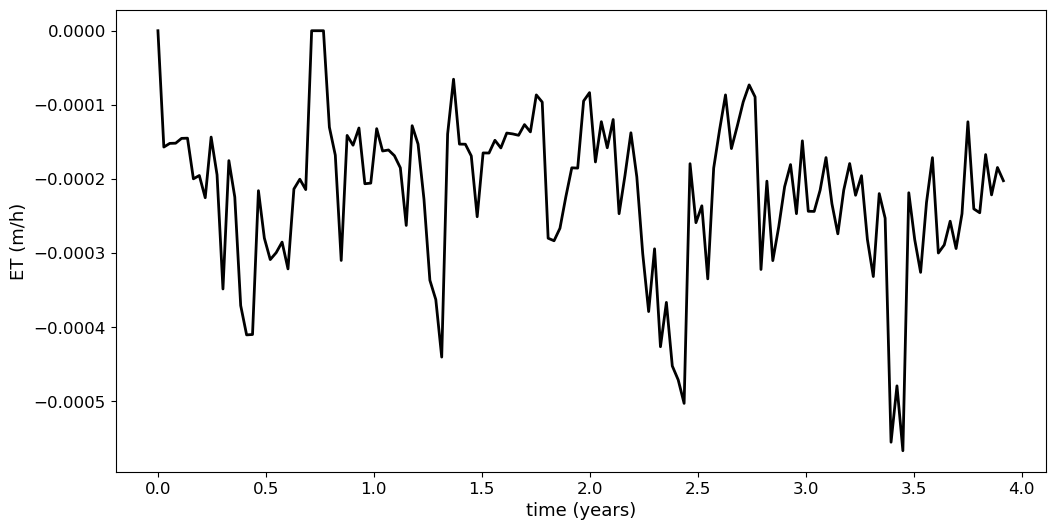

In [33]:
vis = ats_xdmf.VisFile("../Phenology_calibration/ET_output_test/")
vis_surf = ats_xdmf.VisFile("../Phenology_calibration/ET_output_test/", domain="surface")

root_flux = vis.getArray('subsurface_ecosim_water_source')

total_flux = np.sum(root_flux,axis=1)
time = vis.times

plt.figure(figsize=(12,6))
plt.plot(time,total_flux,color='k',lw=2)
plt.xlabel("time (years)",fontsize=13)
plt.ylabel("ET (m/h)",fontsize=13)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

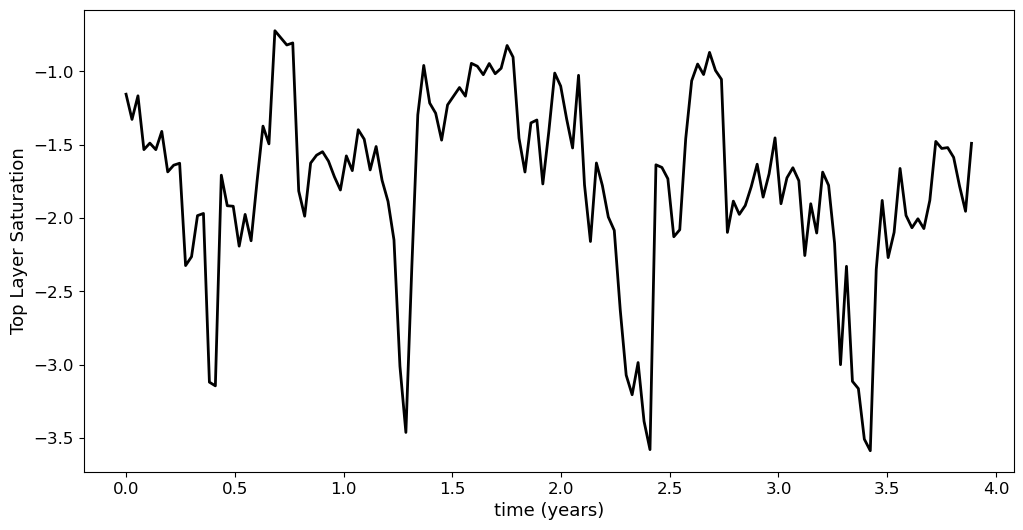

In [32]:
ET_snow = vis_surf.getArray('surface-evapotranspiration')
#print(ET_snow.T[0])
# Calculate differential ET (rate of change)
dt = np.diff(time)  # time differences
dET = np.diff(ET_snow.T[0])   # ET differences
ET_rate = dET / dt  # ET rate (units: [ET units]/[time units])

# Time points for the rate (midpoints or use starting points)
time_rate = time[:-1]  # or time[1:], or (time[:-1] + time[1:])/2 for midpoints
#print(len(time), len(time_rate), len(ET_snow), len(dt), len(dET))
plt.figure(figsize=(12,6))
plt.plot(time_rate,ET_rate, lw=2, color='k')
plt.xlabel("time (years)",fontsize=13)
plt.ylabel("Top Layer Saturation",fontsize=13)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

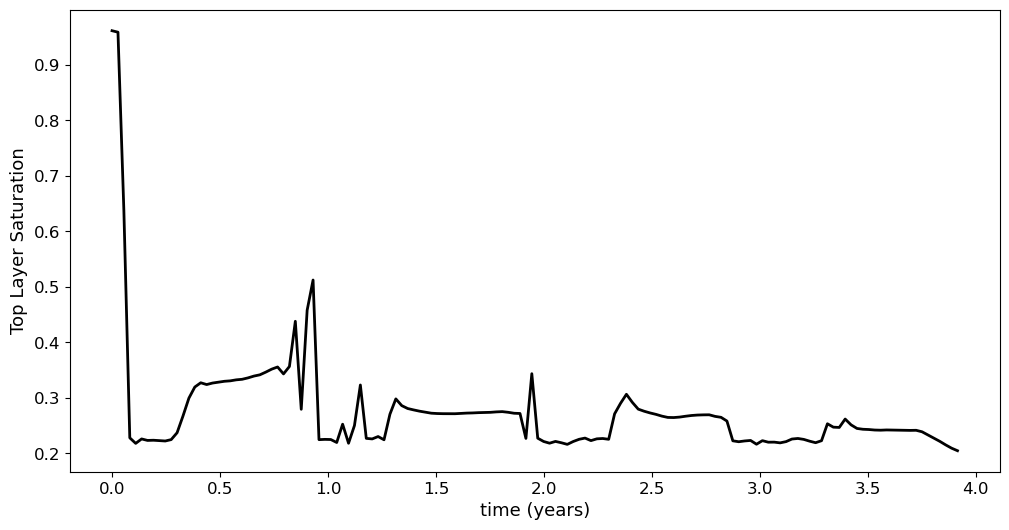

In [12]:
saturation_l = vis.getArray('saturation_liquid')
plt.figure(figsize=(12,6))
plt.plot(time,saturation_l[:,-1], lw=2, color='k')
plt.xlabel("time (years)",fontsize=13)
plt.ylabel("Top Layer Saturation",fontsize=13)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

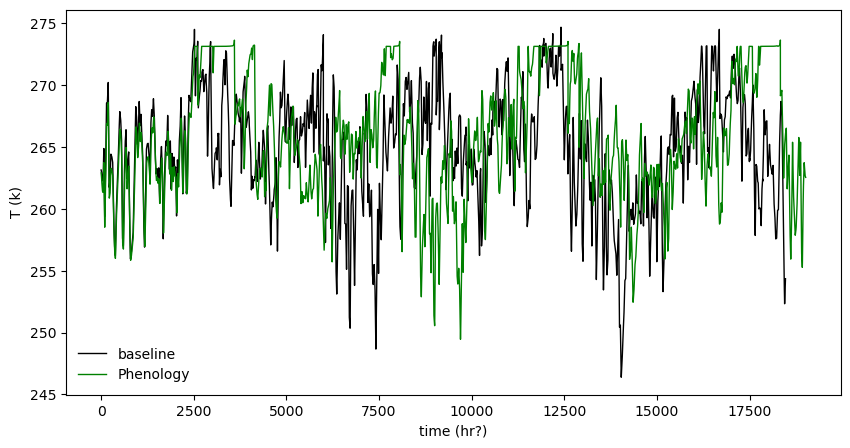

In [6]:
energy_base = np.loadtxt("../Albedo_runs/Baseline_heat_test/snow_debug.txt")
#energy_phen = np.loadtxt("../Phenology_calibration/snow_heat_test/snow_debug.txt")
energy_phen = np.loadtxt("../Phenology_calibration/ET_output_test/snow_debug.txt")

#time = int_alb[:,0]/86400
T_base = energy_base[:,0]
T_phen = energy_phen[:,0]

fig1 = plt.figure(figsize=(10,5))
plt.plot(range(len(T_base)),T_base,color='k',lw=1, label="baseline")
plt.plot(range(len(T_phen)),T_phen,color='g',lw=1, label="Phenology")
#plt.plot(time,sd_high,color='r', label="albeo = 0.9")
plt.legend(frameon=False)
plt.xlabel("time (hr?)")
plt.ylabel("T (k)")
plt.show()


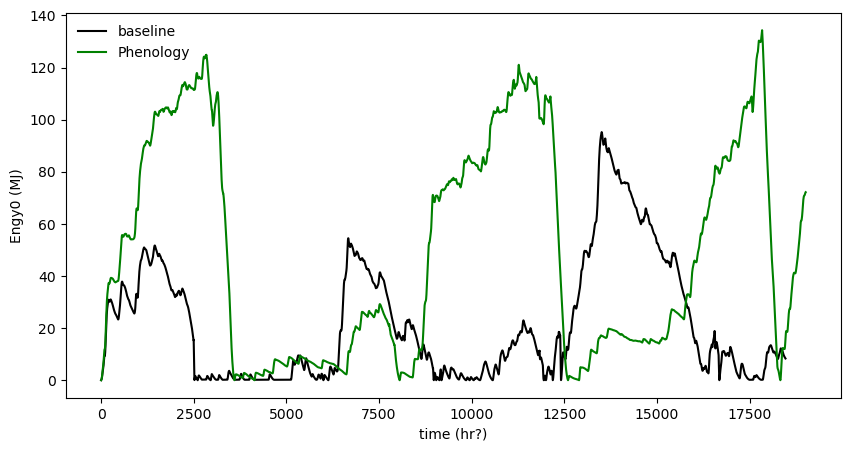

In [7]:
fig2 = plt.figure(figsize=(10,5))
plt.plot(range(len(T_base)),energy_base[:,1],color='k', label="baseline")
plt.plot(range(len(T_phen)),energy_phen[:,1],color='g', label="Phenology")
#plt.plot(time,sd_high,color='r', label="albeo = 0.9")
plt.legend(frameon=False)
plt.xlabel("time (hr?)")
plt.ylabel("Engy0 (MJ)")
plt.show()

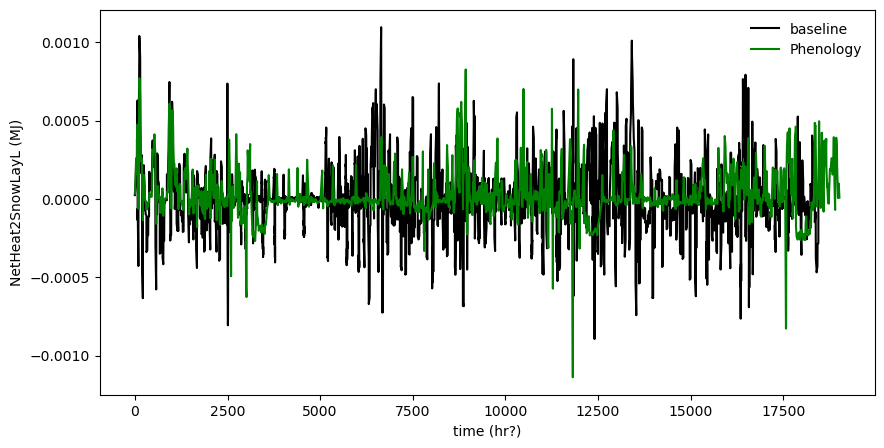

In [8]:
fig2 = plt.figure(figsize=(10,5))
plt.plot(range(len(T_base)),energy_base[:,2],color='k', label="baseline")
plt.plot(range(len(T_phen)),energy_phen[:,2],color='g', label="Phenology")
#plt.plot(time,sd_high,color='r', label="albeo = 0.9")
plt.legend(frameon=False)
plt.xlabel("time (hr?)")
plt.ylabel("NetHeat2SnowLayL (MJ)")
plt.show()

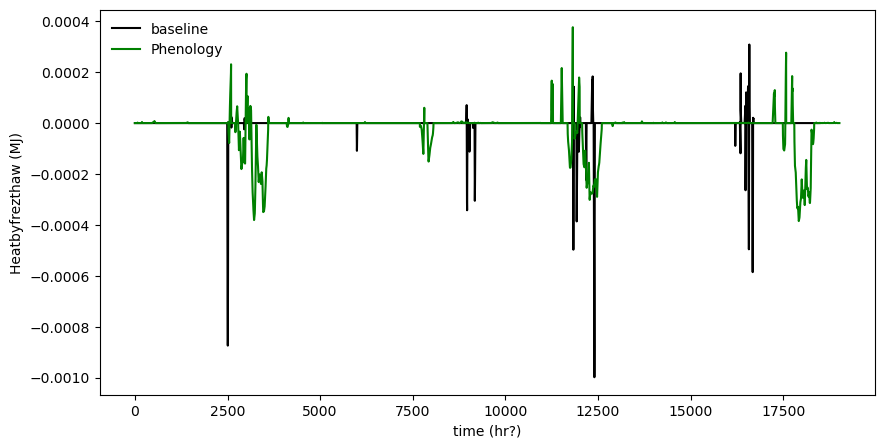

In [9]:
fig2 = plt.figure(figsize=(10,5))
plt.plot(range(len(T_base)),energy_base[:,3],color='k', label="baseline")
plt.plot(range(len(T_phen)),energy_phen[:,3],color='g', label="Phenology")
#plt.plot(time,sd_high,color='r', label="albeo = 0.9")
plt.legend(frameon=False)
plt.xlabel("time (hr?)")
plt.ylabel("Heatbyfrezthaw (MJ)")
plt.show()